# Keras基础


## 一、什么是Keras

<img src="keras.jpeg" style="zoom:50%" >

Keras是一个高层神经网络API，Keras由纯Python编写而成并基Tensorflow、Theano以及CNTK后端。Keras 为支持快速实验而生，能够把你的idea迅速转换为结果，keras的基本特点：

1. 简易和快速的原型设计（keras具有高度模块化，极简，和可扩充特性）
2. 支持CNN和RNN，或二者的结合
3. 无缝CPU和GPU切换

>注意：Keras适用的Python版本是：Python 2.7-3.6

在这里我们使用tensorflow作为keras的后端，实际上tensorflow已经将keras集成进了tensorflow中，所以keras可以看作是tensorflow的一个高阶API。

---

In [1]:
from tensorflow.python import keras
import tensorflow as tf

---

### 二、Keras的重要API

Keras的API主要可以分为以下几类：

`layers`:主要涉及神经网络的一些构件，如全连接，卷积，最大池化等。

`activations`:主要涉及神经网络的常用激活函数。

`losses`:主要涉及一些常用的损失函数。

`metrics`:主要涉及常用的模型评估方法。

`optimizers`:主要涉及常用的优化方法。

`models`:主要涉及模型的组装，模型的保存，模型的加载。

`backend`: 主要涉及更底层的一些操作，如张量的操作。

`callbacks`:主要涉及一些回调函数的操作。如模型的保存，模型的可视化。

---

使用Keras建立神经网络主要包含三个步骤：

1. 准备数据。
2. 搭建神经网络结构。
3. 编译模型（确定损失函数、优化方法和回调函数）。
4. 训练模型。

In [5]:
## layers相关API
input_tensor = keras.layers.Input(shape=(784,))

keras.layers.Dense(units=10,activation=keras.activations.relu,use_bias=True)

keras.layers.Softmax(axis=-1)(input_tensor)

keras.layers.Flatten()

a = keras.layers.Input(shape=(28,))
print(a)
b = keras.layers.Input(shape=(56,))
print(b)
c= keras.layers.concatenate([a,b],axis=-1)
print(c)

Tensor("input_11:0", shape=(?, 28), dtype=float32)
Tensor("input_12:0", shape=(?, 56), dtype=float32)
Tensor("concatenate_3/concat:0", shape=(?, 84), dtype=float32)


In [9]:
## activations相关API
keras.activations.relu
keras.activations.sigmoid
keras.activations.tanh

<function tensorflow.python.keras.activations.tanh(x)>

In [24]:
## losses相关API
keras.losses.categorical_crossentropy
keras.losses.sparse_categorical_crossentropy
keras.losses.mean_squared_error
keras.losses.mean_absolute_error
keras.losses.logcosh()

<function tensorflow.python.keras.losses.mean_squared_error(y_true, y_pred)>

In [27]:
## metric相关API
keras.metrics.accuracy
keras.metrics.sparse_top_k_categorical_accuracy
keras.metrics.Precision()
keras.metrics.Recall()

In [10]:
## optimizers相关API
keras.optimizers.SGD()
keras.optimizers.RMSprop()
keras.optimizers.Adam()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
## models相关API
# Sequential API
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu",input_shape=[10]),keras.layers.Dense(1)])
print(model.input_shape)
model.compile(loss="mean_squared_error", optimizer="sgd")

Instructions for updating:
Colocations handled automatically by placer.
(None, 10)
Instructions for updating:
Use tf.cast instead.


---
<img src="structure1.png" style="zoom:20%" >

In [19]:
#Function API
#单输入单输出
input_tensor = keras.layers.Input(shape=(12,))
hidden1 = keras.layers.Dense(30, activation="relu")(input_tensor)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate(axis=-1)([input_tensor, hidden2])
output_tensor = keras.layers.Dense(1)(concat)
keras.models.Model(inputs=[input_tensor],outputs=[output_tensor])

---
<img src="structure2.png" style="zoom:20%" >

In [20]:
#多输入单输出
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate(axis=-1)([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

---
<img src="structure3.png" style="zoom:40%" >

In [21]:
#多输入多输出
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],outputs=[output, aux_output])
model.compile(loss=["mse", "mae"], loss_weights=[0.9, 0.1], optimizer="sgd")

Instructions for updating:
Use tf.cast instead.


***model的训练***

```python
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,batch_size=64,validation_data=([X_valid_A,X_valid_B],[y_valid, y_valid]))
```


In [22]:
## model系列API
keras.models.save_model
keras.models.load_model

<function tensorflow.python.keras.engine.saving.load_model(filepath, custom_objects=None, compile=True)>

In [23]:
## backend系列API
keras.backend.argmax
keras.backend.sum

<function tensorflow.python.keras.backend.sum(x, axis=None, keepdims=False)>

In [6]:
## callback系列API
keras.callbacks.ModelCheckpoint()
keras.callbacks.TensorBoard()

## 三、 纯Keras的神经网络

下面将使用一个简单的纯keras来实现一个神经网络，纯keras实现神经网络方便且简单。

要解决的问题fashion-mnist数据集问题:

<img src="fashion-mnist.png" style="zoom:50%" >

这是一个十分类问题。

解决步骤:

- 数据准备
- 网络结构设计
- 损失函数设计
- 优化方法设计

In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from tensorflow.python import keras
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
# 数据准备
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_scaler = X_train_full/255.
X_test_scaler = X_test/255.
X_train_scaler = X_train_scaler.reshape(-1,28*28)
X_test_scaler = X_test_scaler.reshape(-1,28*28)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
y_train = keras.utils.to_categorical(y_train_full,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

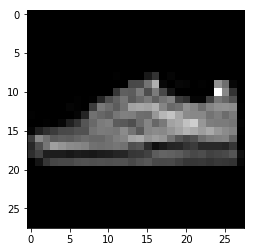

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
index = 666
plt.imshow(X_train_scaler[666].reshape(28,28),cmap='gray')

In [6]:
from tensorflow.python.keras.layers import Dense,Softmax,Activation,Input
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ModelCheckpoint,TensorBoard
from tensorflow.python.keras import backend as K
import os
import tensorflow as tf

# 网络架构设计
input_tensor = Input(shape=(784,))
hidden1 = Activation(activation='relu')(Dense(units=32,use_bias=True)(input_tensor))
hidden2 = Activation(activation='relu')(Dense(units=16,use_bias=True)(hidden1))
logits = Dense(units=10,use_bias=True)(hidden2)
pred = Softmax()(logits)

# 损失函数设计: 注意loss和metric的区别
loss_op = keras.losses.categorical_crossentropy

# 模型评估
def accuracy(y_true,y_pred):
    y_t = tf.argmax(y_true,axis=1)
    y_p = tf.argmax(y_pred,axis=1)
    return tf.reduce_mean(tf.cast(tf.equal(y_t,y_p),tf.float32))



# 优化方法设计
train_op = keras.optimizers.sgd()

# 保存模型
savemodel = ModelCheckpoint(filepath='keras_model/model_dnn.h5')

# 模型组装和编译
model = Model(inputs=[input_tensor],outputs=[pred])
model.compile(loss=[loss_op],optimizer=train_op,metrics=[accuracy])


# 可视化
root_logdir = os.path.join(os.curdir, "keras_logs")
def get_run_logdir(): 
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
print(run_logdir)
tensorboard_cb = TensorBoard(run_logdir)

# 模型的训练
model.fit(X_train_scaler,y_train,epochs=5,validation_data=(X_test_scaler,y_test),callbacks=[savemodel,tensorboard_cb])

./keras_logs/run_2019_08_17-18_17_04
Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.9584 - accuracy: 0.6643 - val_loss: 0.6506 - val_accuracy: 0.7607
Epoch 2/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.5625 - accuracy: 0.8038 - val_loss: 0.5463 - val_accuracy: 0.8077
Epoch 3/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.5009 - accuracy: 0.8243 - val_loss: 0.5042 - val_accuracy: 0.8240
Epoch 4/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.4666 - accuracy: 0.8352 - val_loss: 0.4811 - val_accuracy: 0.8324
Epoch 5/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.4437 - accuracy: 0.8425 - val_loss: 0.4705 - val_accuracy: 0.8300


In [7]:
# 查看参数数量和结构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax_2 (Softmax)          (None, 10)                0         
Total para

In [8]:
# 获取layer的名字
model.layers

In [9]:
# 查看参数
model.layers[1].get_weights()

[array([[ 0.04673344,  0.01502634, -0.07474566, ...,  0.06890095,
         -0.04112365, -0.00896782],
        [-0.00518269, -0.00286345,  0.08053879, ...,  0.07182655,
         -0.01299394, -0.06554333],
        [ 0.08002955, -0.03641549,  0.02303342, ...,  0.0393118 ,
          0.05300613, -0.03454221],
        ...,
        [-0.0828051 ,  0.04777583, -0.02087372, ...,  0.07305664,
          0.06184046,  0.04000294],
        [ 0.01623803, -0.03462012, -0.0404018 , ...,  0.07255101,
          0.01709375,  0.01892226],
        [-0.07676131, -0.00633865,  0.07296253, ..., -0.00274478,
          0.08141113, -0.00275608]], dtype=float32),
 array([-0.13452972,  0.02142563, -0.02201729,  0.1591276 , -0.11847489,
         0.12031773, -0.01768341, -0.01737609,  0.00054321, -0.1729853 ,
         0.04432423, -0.01464177,  0.32178038,  0.25212777,  0.19860578,
         0.1715567 , -0.10305091, -0.16290314,  0.02499877,  0.12938379,
         0.24135025, -0.05990688,  0.0913938 ,  0.20561   ,  0.071

In [10]:
from tensorflow.python.keras.models import load_model
model = load_model('keras_model/model_dnn.h5')
index = 666
img = X_test_scaler[index].reshape(1,-1)
pred = model.predict(img)
print(class_names[np.argmax(pred)])

Dress


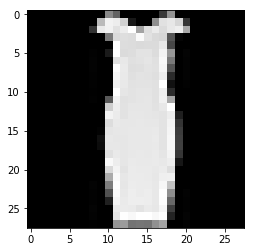

In [5]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
index = 666
img = X_test_scaler[index]
plt.imshow(img.reshape(28,28),cmap='gray')

---
## 四、Keras中的现成模型

`/site-packages/keras_applications/`



In [12]:
tf.keras.applications.inception_v3.InceptionV3

<function tensorflow.python.keras.applications.keras_modules_injection.<locals>.wrapper(*args, **kwargs)>

In [8]:
input_shape=(224,224,1)
base_model = tf.keras.applications.inception_v3.InceptionV3(include_top=True, weights=None, input_shape=input_shape, classes=100)

In [9]:
x=base_model.output

In [10]:
x.shape

TensorShape([Dimension(None), Dimension(100)])